<a href="https://colab.research.google.com/github/kundana12345/DataScience/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No because its used for comparing models.

**Task2**:

Describe overfitting, in the context of this course

When the model can predict the data that was used to train the model well, but doesn't really work on other data.

**Task3**:

How do we mitigate overfitting?

Use weak priors (to tell the model that most effects are probably small unless the data clearly points the other way) and less variables (so there are less ways for the model to justify noise based off the model).

**Task4**:

How do we mitigate underfitting?

Use elpd_loo to compare different models, the one with the highest elpd_loo is probably most accurate.

**Task5**:

Why would we want more than one predictor in a model?

If there is more than one factor that effects whatever you are trying to predict. It can also maybe make sure that one predictor doesn't impact the model too much if it isn't supposed to.

**Task6**:

Can we have too many predictors? How would we know?

Yes. It can lead to overfitting because the model has many ways to say that noise is impacting the dependent variable. You can see if a model is overfitting based on if it can predict on different data than what was used to train the model.

**Task7**:

What is variable selection, and how does it work?

Variable selection is what is used to figure out the predictors that are useful for the model. You create different models with different combinations of predictors and compare their elpd_loos. You should use causal diagrams to figure out what predictors to use.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.



*   The categories are different but same continuous variable: different intercepts for each category and the same slope.
*   Categories have their own intercepts and slopes but they are related not independent: the slopes interact with each other.


*   The effect of the continous predictors depends on the category: they will have different slopes.




**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

Causal diagrams are one way to see everything at once, but not as in depth. You cannot do more than two predictors.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [3]:
!pip install bambi
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 14.3 MB/s eta 0:00:00


In [4]:
import bambi as bmb

In [5]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [6]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

I used gemini to help with the stuff below:

In [28]:
# Model 1: Free throw percentage and position (categorical)
model1 = bmb.Model('FGp ~ FTp + Pos', bb, keep_log_likelihood=True)
idata1 = model1.fit(draws=2000, tune=1000, random_seed=42)
bmb.interpret.plot_predictions(model1,
                               idata1,
                               ["FTp", "Pos"],
                               fig_kwargs={"figsize":(11, 4)})
plt.show()

TypeError: Model.__init__() got an unexpected keyword argument 'keep_log_likelihood'

In [29]:
# Model 2: Free throw percentage and position (hierarchical)
model2 = bmb.Model('FGp ~ FTp + (1|Pos)', bb, keep_log_likelihood=True)
idata2 = model2.fit(draws=2000, tune=1000, random_seed=42, target_accept=0.99)

TypeError: Model.__init__() got an unexpected keyword argument 'keep_log_likelihood'

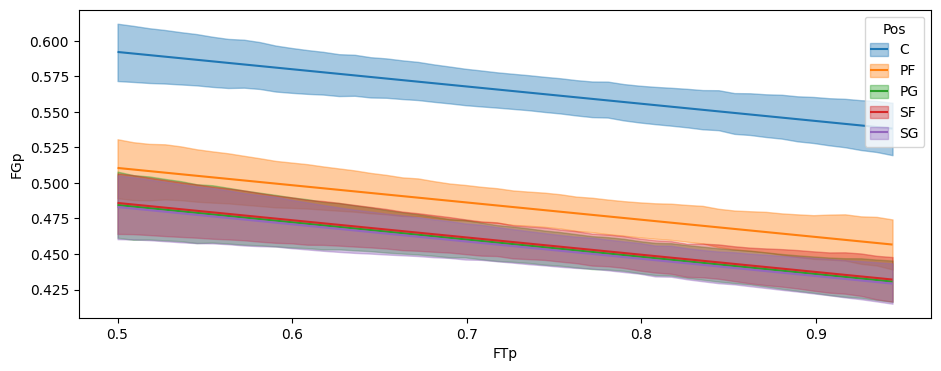

In [13]:
bmb.interpret.plot_predictions(model2,
                               idata2,
                               ["FTp", "Pos"],

                               fig_kwargs={"figsize":(11, 4)})
plt.show()

In [30]:
# Model 3: Free throw percentage and position with interaction
model3 = bmb.Model('FGp ~ FTp * Pos', bb, keep_log_likelihood=True)
idata3 = model3.fit(draws=2000, tune=1000, random_seed=42, target_accept=0.99)
bmb.interpret.plot_predictions(model3,
                               idata3,
                               ["FTp", "Pos"],
                               fig_kwargs={"figsize":(11, 4)})
plt.show()

TypeError: Model.__init__() got an unexpected keyword argument 'keep_log_likelihood'

In [31]:
# Model 4: FTp, Pos, ThreePA with all main effects and interactions (explicitly defined)
model4 = bmb.Model('FGp ~ FTp + Pos + ThreePA + FTp:Pos + FTp:ThreePA + Pos:ThreePA + FTp:Pos:ThreePA', bb, keep_log_likelihood=True)
idata4 = model4.fit(draws=2000, tune=1000, random_seed=42, target_accept=0.99)
bmb.interpret.plot_predictions(model4,
                               idata4,
                               ["FTp", "Pos"],
                               fig_kwargs={"figsize":(11, 4)})
plt.show()

TypeError: Model.__init__() got an unexpected keyword argument 'keep_log_likelihood'

In [17]:
print(bb.columns)

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGp', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FTp', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player-additional'],
      dtype='object')


In [22]:
# Rename '3PA' column to avoid issues with bambi's formula parsing
bb.rename(columns={'3PA': 'ThreePA'}, inplace=True)
print(bb.columns)

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGp', '3P',
       'ThreePA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FTp', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player-additional'],
      dtype='object')


 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   3000    0             0.008       1023         9.52 draws/s     0:05:14   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   3000    0             0.008       511          4.69 draws/s     0:10:39   0:00:00

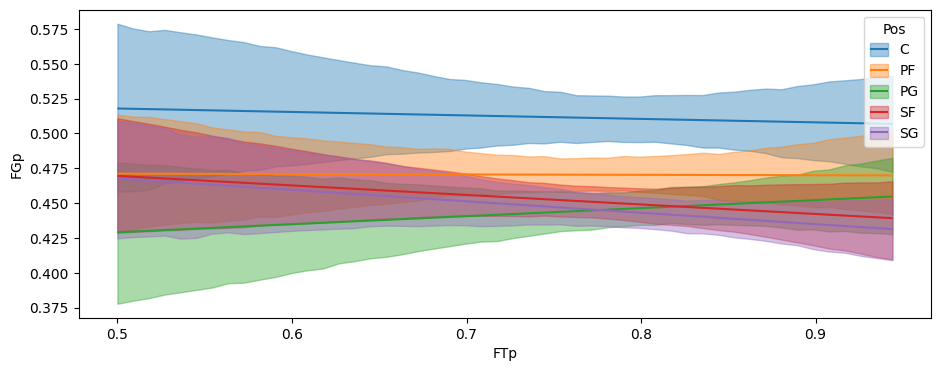

In [23]:
# Model 4: FTp, Pos, ThreePA with all main effects and interactions (explicitly defined)
model4 = bmb.Model('FGp ~ FTp + Pos + ThreePA + FTp:Pos + FTp:ThreePA + Pos:ThreePA + FTp:Pos:ThreePA', bb)
idata4 = model4.fit(draws=2000, tune=1000, random_seed=42, target_accept=0.99)
bmb.interpret.plot_predictions(model4,
                               idata4,
                               ["FTp", "Pos"],
                               fig_kwargs={"figsize":(11, 4)})
plt.show()

Output()

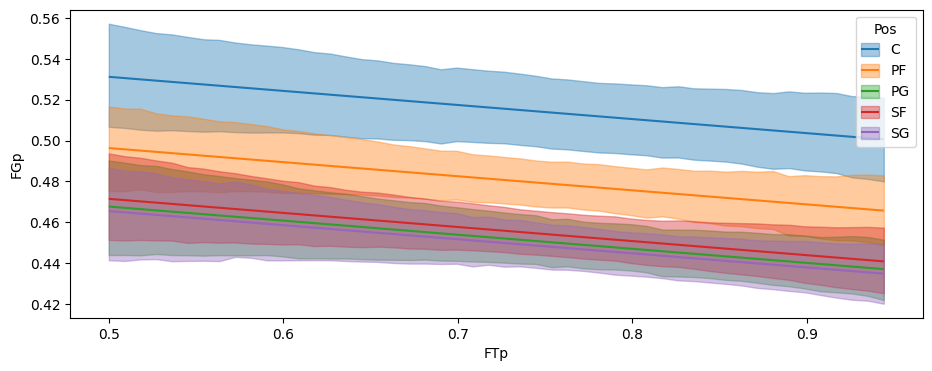

In [25]:
# Model 5: FTp, Pos, ThreePA with interaction between ThreePA and position
model5 = bmb.Model('FGp ~ FTp + Pos * ThreePA', bb)
idata5 = model5.fit(draws=2000, tune=1000, random_seed=42, target_accept=0.99)
bmb.interpret.plot_predictions(model5,
                               idata5,
                               ["FTp", "Pos"],
                               fig_kwargs={"figsize":(11, 4)})
plt.show()

In [32]:
# Model 5: FTp, Pos, ThreePA with interaction between ThreePA and position
model5 = bmb.Model('FGp ~ FTp + Pos * ThreePA', bb, keep_log_likelihood=True)
idata5 = model5.fit(draws=2000, tune=1000, random_seed=42, target_accept=0.99)
bmb.interpret.plot_predictions(model5,
                               idata5,
                               ["FTp", "Pos"],
                               fig_kwargs={"figsize":(11, 4)})
plt.show()

TypeError: Model.__init__() got an unexpected keyword argument 'keep_log_likelihood'

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

In [27]:
model_dict = {
    "Model 1 (FTp + Pos)": idata1,
    "Model 2 (FTp + (1|Pos))": idata2,
    "Model 3 (FTp * Pos)": idata3,
    "Model 4 (All interactions)": idata4,
    "Model 5 (FTp + Pos * ThreePA)": idata5
}

comp_df = az.compare(model_dict)
print(comp_df)

az.plot_compare(comp_df)
plt.show()

TypeError: Encountered error in ELPD computation of compare.

In [26]:
print(az.loo(idata1))
print(az.loo(idata2))
print(az.loo(idata3))
print(az.loo(idata4))
print(az.loo(idata5))

TypeError: log likelihood not found in inference data object

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [ ]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [ ]:
body.head()